## Hypothesis testing and confidante interval

### A principal of a prestigious city college claims that the average intelligence of the students of the college is above average. A random sample of 100 students IQ scores have a mean score of 115. The mean population mean IQ is 100 with a standard deviation of 15.

### μ = 100
### σ = 15
### x̄ = 115
### n = 100 Student

**Is there sufficient evidence to support the principal's claim?**

In [1]:
import numpy as np
from scipy import stats
from sklearn.model_selection import LeaveOneOut, GridSearchCV, KFold, GroupKFold, RepeatedKFold

In [2]:
np.round(stats.norm.isf(q=0.05), 2)

np.float64(1.64)

In [3]:
population_mean = 100
population_std_deviation = 15
sample_mean = 115
sample_size = 100

z_statistics = (sample_mean - population_mean) / (population_std_deviation / np.sqrt(sample_size))
z_statistics

# reject the null hypothesis 

np.float64(10.0)

In [4]:
np.round(stats.norm.ppf(q=0.84), 2)

np.float64(0.99)

1.959963984540054


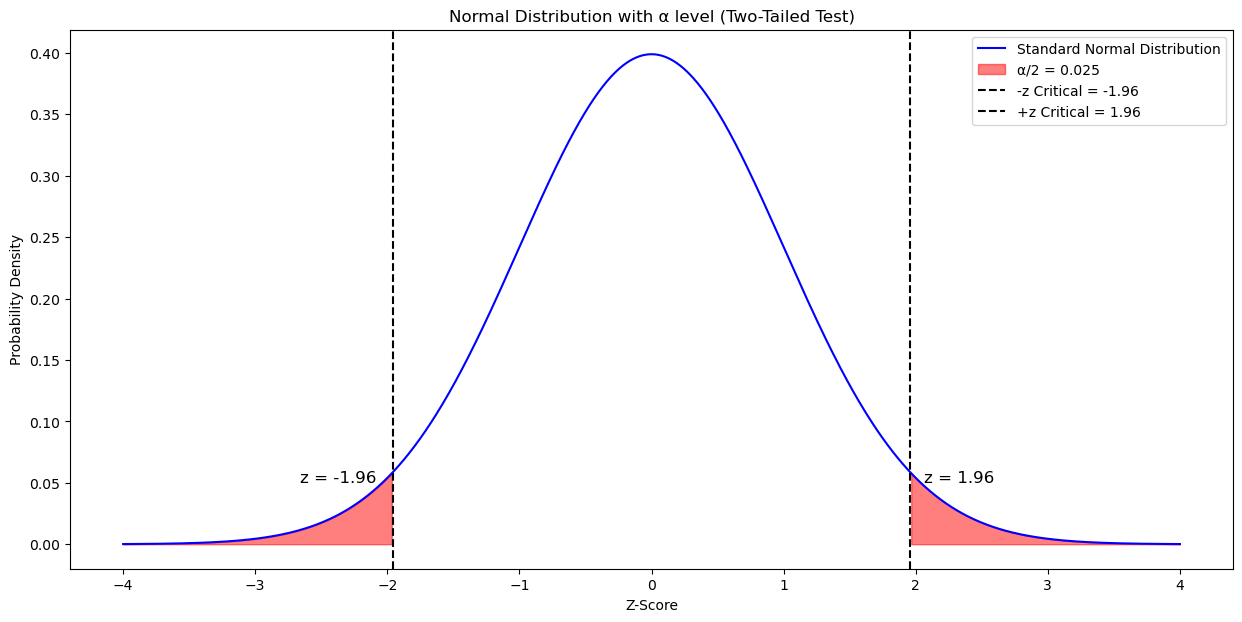

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.figure(figsize=(15,7))
# Define the alpha level (for a two-tailed test with 95% confidence)
alpha = 0.05
alpha_half = alpha / 2  # For two-tailed test

# Generate values for the normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Standard normal distribution (mean=0, std=1)

# Critical z-scores for 95% confidence level (2.5% in each tail)
z_critical = norm.ppf(1 - alpha_half)
print(z_critical)
# Plot the normal distribution
plt.plot(x, y, label='Standard Normal Distribution', color='blue')

# Shade the critical regions (alpha areas)
plt.fill_between(x, 0, y, where=(x <= -z_critical), color='red', alpha=0.5, label=f'α/2 = {alpha_half}')
plt.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.5)

# Add text and lines for critical z-scores
plt.axvline(-z_critical, color='black', linestyle='--', label=f'-z Critical = {-z_critical:.2f}')
plt.axvline(z_critical, color='black', linestyle='--', label=f'+z Critical = {z_critical:.2f}')
plt.text(-z_critical - 0.7, 0.05, f'z = {-z_critical:.2f}', fontsize=12)
plt.text(z_critical + 0.1, 0.05, f'z = {z_critical:.2f}', fontsize=12)

# Labeling the plot
plt.title('Normal Distribution with α level (Two-Tailed Test)')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()


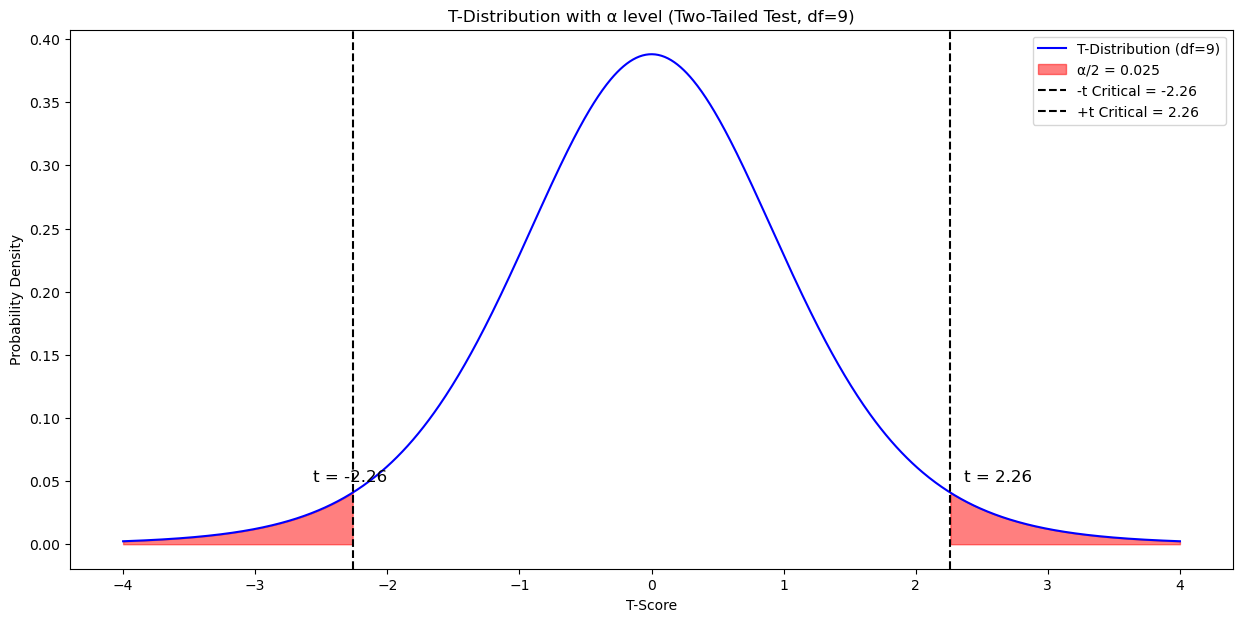

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
plt.figure(figsize=(15,7))

# Define the alpha level (for a two-tailed test with 95% confidence)
alpha = 0.05
alpha_half = alpha / 2  # For two-tailed test
n = 10  # Small sample size
df = n - 1  # Degrees of freedom for t-distribution

# Generate values for the t-distribution
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)  # t-distribution with df degrees of freedom

# Critical t-scores for 95% confidence level (2.5% in each tail)
t_critical = t.ppf(1 - alpha_half, df)

# Plot the t-distribution
plt.plot(x, y, label=f'T-Distribution (df={df})', color='blue')

# Shade the critical regions (alpha areas)
plt.fill_between(x, 0, y, where=(x <= -t_critical), color='red', alpha=0.5, label=f'α/2 = {alpha_half}')
plt.fill_between(x, 0, y, where=(x >= t_critical), color='red', alpha=0.5)

# Add text and lines for critical t-scores
plt.axvline(-t_critical, color='black', linestyle='--', label=f'-t Critical = {-t_critical:.2f}')
plt.axvline(t_critical, color='black', linestyle='--', label=f'+t Critical = {t_critical:.2f}')
plt.text(-t_critical - 0.3, 0.05, f't = {-t_critical:.2f}', fontsize=12)
plt.text(t_critical + 0.1, 0.05, f't = {t_critical:.2f}', fontsize=12)

# Labeling the plot
plt.title(f'T-Distribution with α level (Two-Tailed Test, df={df})')
plt.xlabel('T-Score')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()


In a bank, the average time taken for getting a demand draft or bankers cheque is 15 minutes. From the past experience, you can assume that the population is normally distributed with a population standard deviation of 1.6 minutes. You select a sample of 50 requests for demand drafts and the sample mean is 14 minutes. Deteremine whether there is evidence at a 5% level of significance that the population mean service time to get the demand draft has changed from the population mean of 15 minutes.

z_critical: 1.96
z_statistics: -4.419417382415922
p-value: 0.000009896734625
Reject the Null Hypothesis


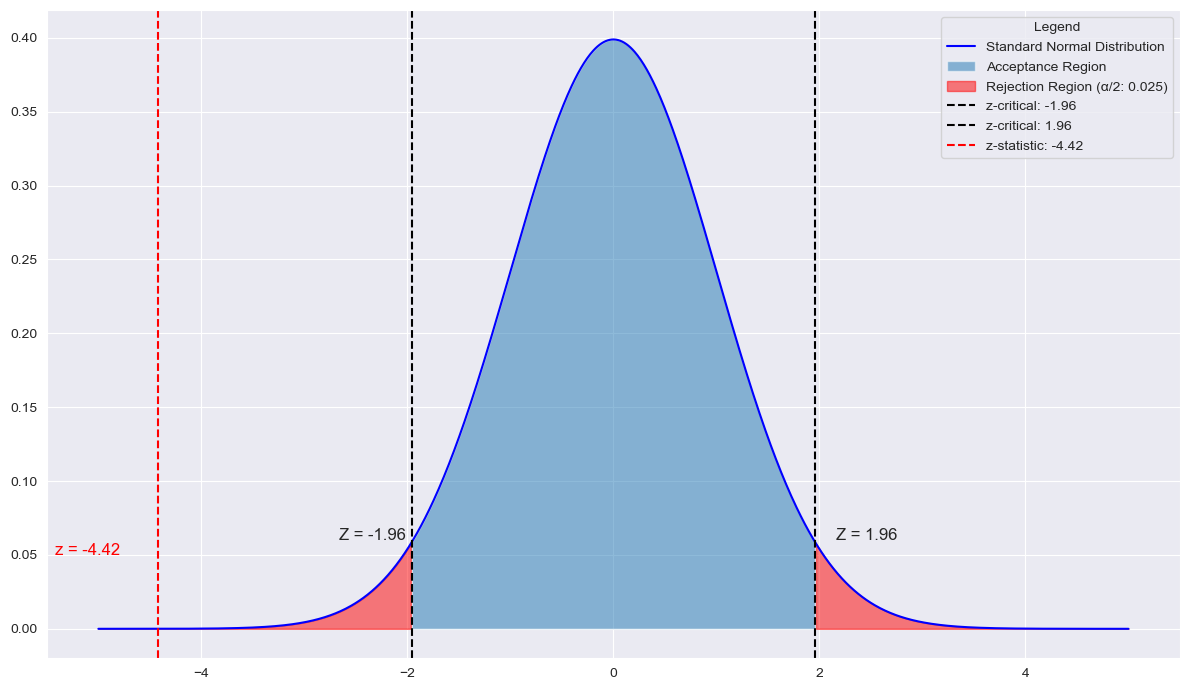

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm  # For normal distribution functions
import os

# file path
file_path = os.getcwd()

# Set background style
sns.set_style(style="darkgrid")

# Define parameters
population_mean = 15
population_std_deviation = 1.6
sample_size = 50
sample_mean = 14
alpha = 0.05
alpha_half = alpha / 2

# Create x-axis values for the standard normal distribution
x = np.linspace(start=-5, stop=5, num=1000)

# Calculate probability density function (PDF) of the standard normal distribution
y = norm.pdf(x=x)

# Create the figure
plt.figure(figsize=(12, 7))

# Plot the standard normal distribution (blue)
plt.plot(x, y, label="Standard Normal Distribution", color="blue")

# Calculate the critical z-values (one-tailed test for alpha/2 on each side)
z_critical = np.round(norm.ppf(1 - alpha_half), 2)

# Calculate the z-statistic
z_statistics = (sample_mean - population_mean) / (population_std_deviation / np.sqrt(sample_size))

# Create a boolean mask for the acceptance region
acceptance_region = (x >= -z_critical) & (x <= z_critical)

# Fill the acceptance region with blue
plt.fill_between(x, 0, y, where=acceptance_region, alpha=0.5, label="Acceptance Region")

# Fill the rejection regions (red, alpha=0.5 transparency)
plt.fill_between(x, 0, y, where=(x <= -z_critical), color="red", alpha=0.5, label=f"Rejection Region (α/2: {alpha_half})")
plt.fill_between(x, 0, y, where=(x >= z_critical), color="red", alpha=0.5)

# Draw vertical lines for critical z-values (dashed black)
plt.axvline(x=-z_critical, linestyle="--", color="black", label=f"z-critical: {-z_critical:.2f}")
plt.axvline(x=z_critical, linestyle="--", color="black", label=f"z-critical: {z_critical:.2f}")

# Draw vertical line for z-statistic (dashed red)
plt.axvline(x=z_statistics, linestyle="--", color="red", label=f"z-statistic: {z_statistics:.2f}")

# Add text labels for critical z-values and z-statistic (adjusted positioning)
plt.text(x=-z_critical - 0.7, y=0.06, s=f"Z = {-z_critical:.2f}", fontsize=12)
plt.text(x=z_critical + 0.2, y=0.06, s=f"Z = {z_critical:.2f}", fontsize=12)
plt.text(x=z_statistics - 1, y=0.05, s=f"z = {z_statistics:.2f}", fontsize=12, color="red")  # Red for z-statistic

# Print calculated values
print(f"z_critical: {z_critical}\nz_statistics: {z_statistics}")

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(np.abs(z_statistics)))
print(f"p-value: {p_value:.15f}")

# Decision based on z-statistic
if -z_critical <= z_statistics <= z_critical:
    print("Fail to Reject the Null Hypothesis")  # More precise wording
else:
    print("Reject the Null Hypothesis")  # Added to legend

# Add legend with informative labels
plt.legend(title="Legend")  # Add title for clarity

# Improve layout
plt.tight_layout()

# save image
plt.savefig(os.path.join(file_path, "bank_time_interval.png"))
# Display the plot
plt.show()

Hindustan Pencils Pvt. Ltd. is an Indian manufacturer of pencils, writing materials and other stationery items, established in 1958 in Mumbai. Nataraj brand of pencils manufactured by the company is expected to have a mean length of 172 mm and the standard deviation of the length is 0.02 mm.

To ensure quality, a sample is selected at periodic intervals to determine whether the length is still 172 mm and other dimensions of the pencil meet the quality standards set by the company.

You select a random sample of 100 pencils and the mean is 170 mm.

Construct a 95% confidenct interval for the pencil length.

In [8]:
ci     = 0.95
Xavg   = 172
sigma  = 0.02
s      = sigma / np.sqrt(n)
LCI, UCI = stats.norm.interval(confidence=ci, loc = Xavg, scale = s) # Give confidence interval 95%, mean and std as arguments to get CI
print('95 %s confidence interval for population mean is %1.4f  to %1.4f' % ('%', LCI , UCI))

95 % confidence interval for population mean is 171.9876  to 172.0124


Hindustan Pencils Pvt. Ltd. is an Indian manufacturer of pencils, writing materials and other stationery items, established in 1958 in Mumbai. Nataraj brand of pencils manufactured by the company is expected to have a mean length of 172 mm and the standard deviation of the length is 0.02 mm.

To ensure quality, a sample is selected at periodic intervals to determine whether the length is still 172 mm and other dimensions of the pencil meet the quality standards set by the company.

You select a random sample of 100 pencils and the mean is 170 mm.

Construct a 95% confidenct interval for the pencil length.

In [9]:
sample_mean = 172
ci = 0.95
sigma = 0.02
sample_std = sigma / np.sqrt(100)
LCI, UCI = stats.norm.interval(confidence=ci, loc=sample_mean, scale=sample_std)
print(f"95% confidence interval for the population mean is {LCI:.3f} to {UCI:.3f}")

95% confidence interval for the population mean is 171.996 to 172.004


# One-Sample t-test

Very rarely do we know the variance of the population.  
A common strategy to assess a hypothesis is to conduct a t-test. A t-test can tell whether two groups have the same mean. A t-test can be estimated for:

- **One-sample t-test**
- **Two-sample t-test** (including paired t-test)

We assume that the samples are randomly selected, independent, and come from a normally distributed population with unknown but equal variances.

---

## Example 4: Internet Mobile Time

Experian Marketing Services reported that the typical American spends a mean of **144 minutes (2.4 hours)** per day accessing the Internet via a mobile device.  
(Source: The 2014 Digital Marketer, available at [ex.pn/IkXJjfX](http://ex.pn/IkXJjfX))

In order to test the validity of this statement, you select a sample of 30 friends and family. The results for the time spent per day accessing the Internet via mobile device (in minutes) are stored in `InternetMobileTime`.

### (a) Is there evidence that the population mean time spent per day accessing the Internet via mobile device is different from 144 minutes? 
- **Use the p-value approach and a level of significance of 0.05.**

### (b) What assumption about the population distribution is needed in order to conduct the t-test in (a)?

---

Problem 9.35 from the Textbook adapted for Classroom Discussion (Chapter 9, page 314).


## Hypotheses testing 
### Null Hypotheses : μ = 144
### alternative Hypotheses : μ != 144

mean: 175.267
standard deviation: 139.837
Failed to reject the null hypotheses
± t_critical: 2.045230
t_statistics: 1.096723
p_value: 0.281786


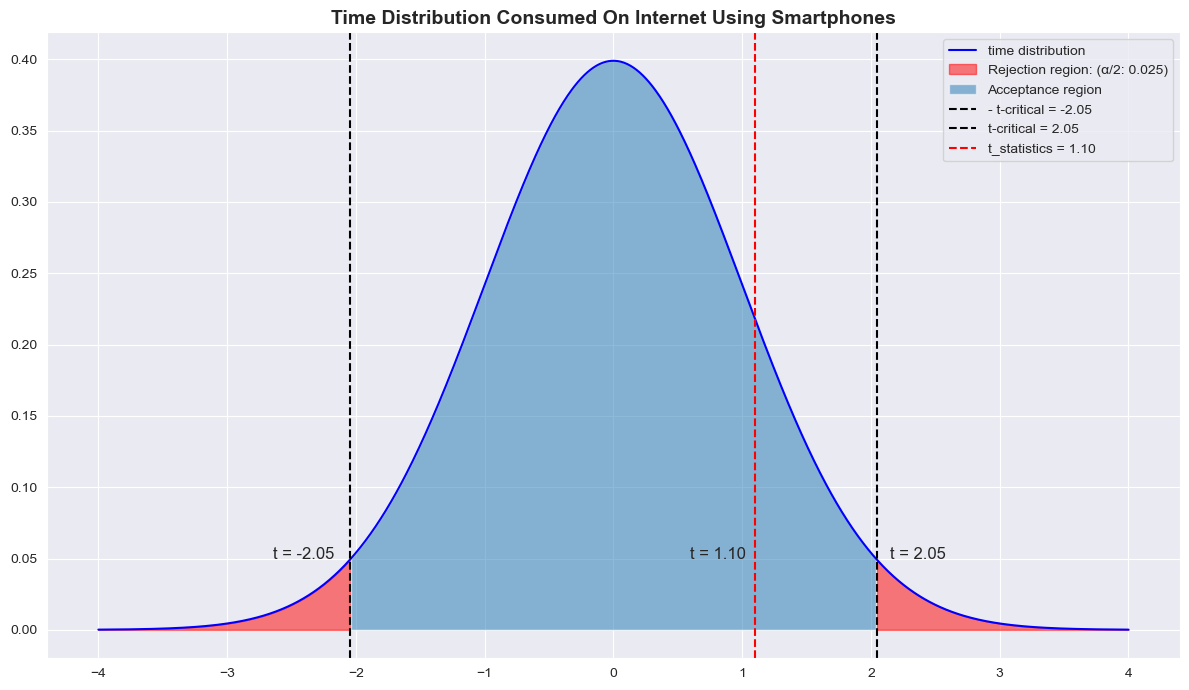

In [10]:
## Hypotheses testing 
### Null Hypotheses : μ = 144
### alternative Hypotheses : μ != 144

import pandas as pd
phone_time = pd.read_csv(r"InternetMobileTime.csv")

mean_phone_time = np.mean(phone_time["Minutes"], axis=0)
std_phone_time = np.std(phone_time["Minutes"], axis=0, ddof=1)

print(f"mean: {mean_phone_time:.3f}\nstandard deviation: {std_phone_time:.3f}")
phone_time.shape
alpha = 0.05
alpha_half = alpha / 2
df = phone_time.shape[0] - 1

t_critical = stats.t.ppf((1 - alpha_half), df)
t_statistics = (sample_mean - 144) / (std_phone_time / np.sqrt(phone_time.shape[0]))
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistics), df))
threshold = 0.05

if -t_critical <= t_statistics <= t_critical and p_value > threshold:
    print("Failed to reject the null hypotheses")
else:
    print("reject the null hypotheses")

print(f"± t_critical: {t_critical:5f}\nt_statistics: {t_statistics:5f}\np_value: {p_value:5f}")

plt.figure(figsize=(12, 7))
x = np.linspace(start=-4, stop=4, num=1000)
y = stats.norm.pdf(x=x)

plt.plot(x,y, label="time distribution", color="blue")

middle_fill = (x >= -t_critical) & (x <= t_critical)

plt.fill_between(x, 0, y, where=(x <= -t_critical), color="red", label=f"Rejection region: (α/2: {alpha_half})", alpha=0.5)
plt.fill_between(x, 0, y, where=(x >= t_critical), color="red", alpha=0.5)
plt.fill_between(x, 0, y, where=middle_fill,  label=f"Acceptance region", alpha=0.5)

plt.axvline(-t_critical, linestyle="--", color="black", label=f"- t-critical = {-t_critical:.2f}")
plt.axvline(t_critical, linestyle="--", color="black", label=f"t-critical = {t_critical:.2f}")
plt.axvline(t_statistics, linestyle="--", color="red", label=f"t_statistics = {t_statistics:.2f}")

plt.text(-t_critical -0.6, 0.05, s=f"t = {-t_critical:.2f}", fontsize=12)
plt.text(t_critical + 0.1, 0.05, s=f"t = {t_critical:.2f}", fontsize=12)
plt.text(t_statistics -0.5, 0.05, s=f"t = {t_statistics:.2f}", fontsize=12)

plt.title(label="time distribution consumed on internet using smartphones".title(), fontdict={"fontsize" : 14, "fontweight": "bold"})

plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(file_path, "InternetMobileTime.png"))
plt.show()


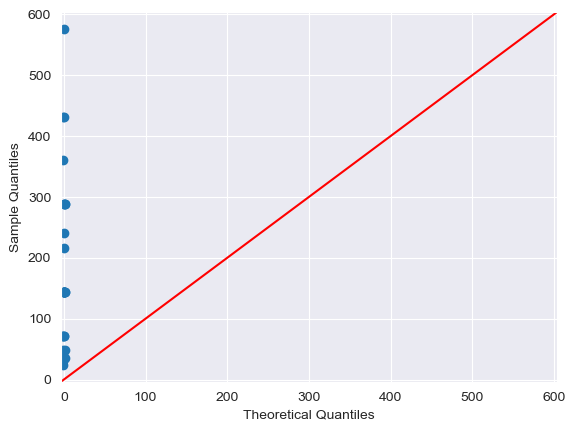

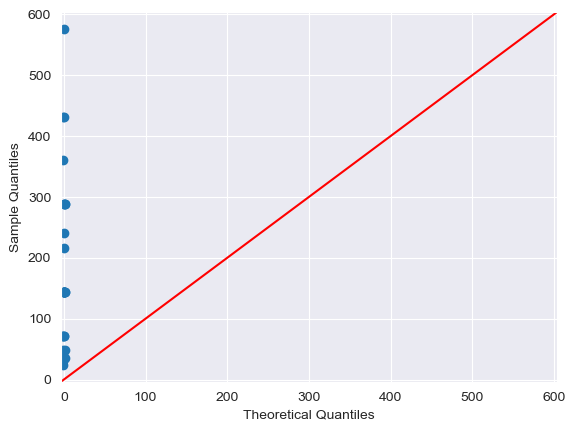

In [11]:
import statsmodels.api as sm
sm.qqplot(phone_time, line="45")

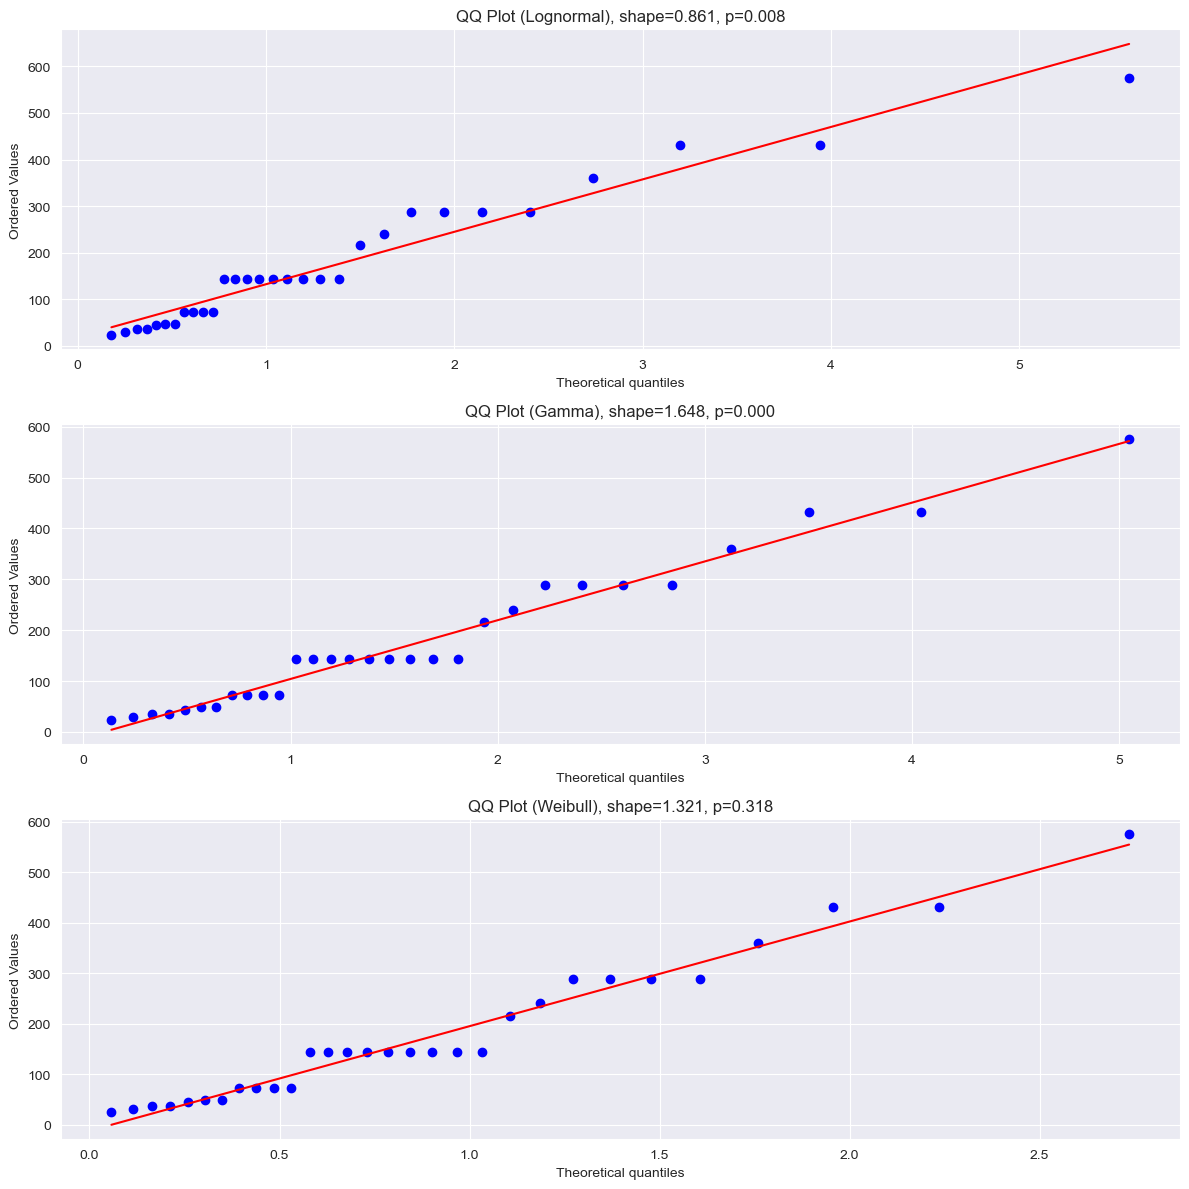

In [12]:
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

shape, loc, scale = stats.lognorm.fit(phone_time['Minutes'], floc=0)
lognorm_shape = shape

shape, loc, scale = stats.gamma.fit(phone_time['Minutes'], floc=0)
gamma_shape = shape

shape, loc, scale = stats.weibull_min.fit(phone_time['Minutes'], floc=0)
weibull_shape = shape

_, p_lognorm = stats.kstest(phone_time['Minutes'], 'lognorm', args=(lognorm_shape, loc, scale))
_, p_gamma = stats.kstest(phone_time['Minutes'], 'gamma', args=(gamma_shape, loc, scale))
_, p_weibull = stats.kstest(phone_time['Minutes'], 'weibull_min', args=(weibull_shape, loc, scale))

plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
stats.probplot(phone_time['Minutes'], dist="lognorm", sparams=(lognorm_shape,), plot=plt)
plt.title(f'QQ Plot (Lognormal), shape={lognorm_shape:.3f}, p={p_lognorm:.3f}')

plt.subplot(3, 1, 2)
stats.probplot(phone_time['Minutes'], dist="gamma", sparams=(gamma_shape,), plot=plt)
plt.title(f'QQ Plot (Gamma), shape={gamma_shape:.3f}, p={p_gamma:.3f}')

plt.subplot(3, 1, 3)
stats.probplot(phone_time['Minutes'], dist="weibull_min", sparams=(weibull_shape,), plot=plt)
plt.title(f'QQ Plot (Weibull), shape={weibull_shape:.3f}, p={p_weibull:.3f}')

plt.tight_layout()
plt.show()

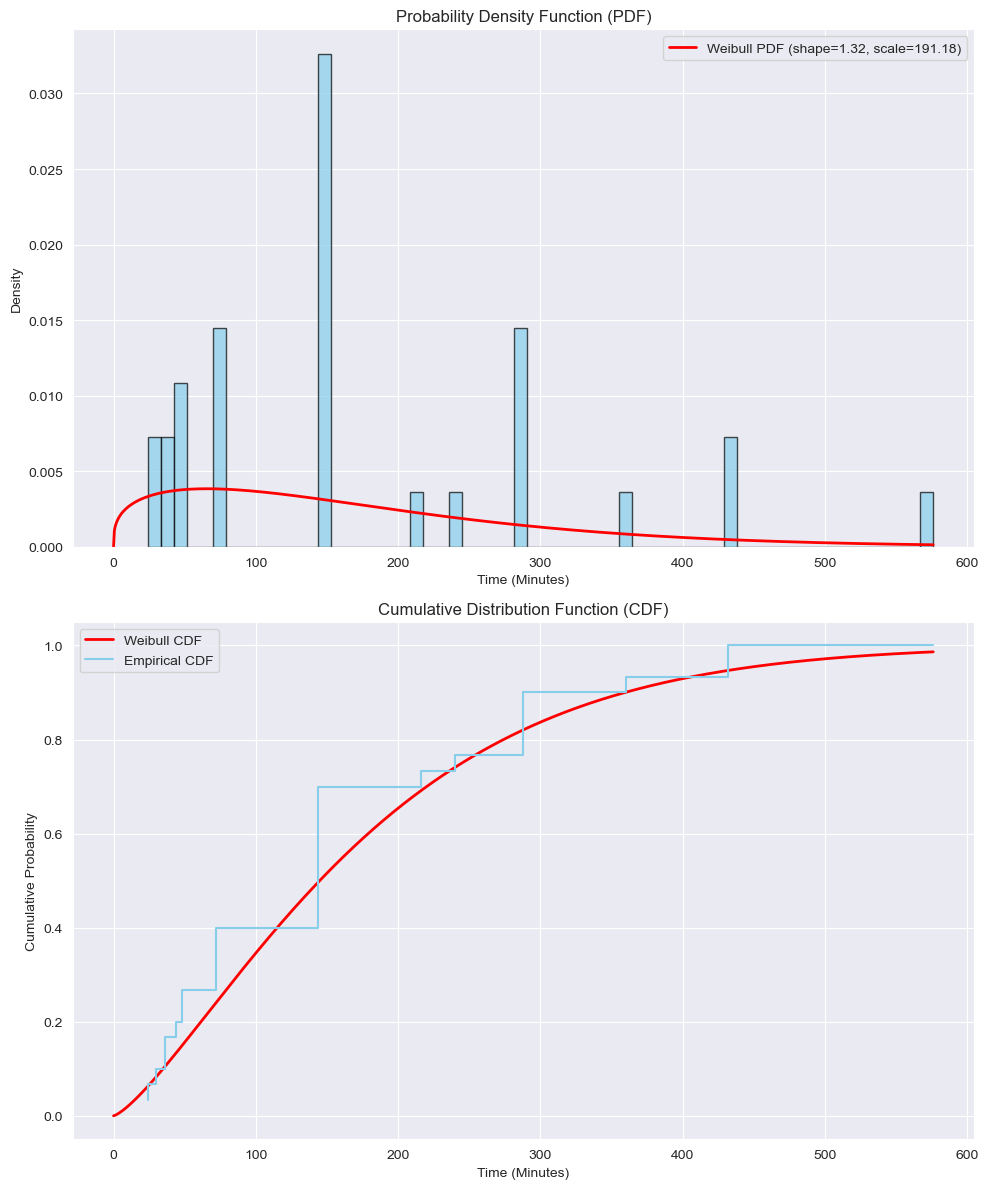

Weibull shape parameter: 1.3213
Weibull scale parameter: 191.1786

Kolmogorov-Smirnov test results:
KS statistic: 0.1694
p-value: 0.3185


In [13]:
# Extract the 'Minutes' column
data = phone_time['Minutes']

# Fit Weibull distribution to the data
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Create a range of x values for plotting
x = np.linspace(0, max(data), 1000)

# Calculate the PDF and CDF of the fitted Weibull distribution
pdf_fitted = stats.weibull_min.pdf(x, shape, loc, scale)
cdf_fitted = stats.weibull_min.cdf(x, shape, loc, scale)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot PDF
ax1.hist(data, bins=60, density=True, alpha=0.7, color='skyblue', edgecolor='black')
ax1.plot(x, pdf_fitted, 'r-', lw=2, label=f'Weibull PDF (shape={shape:.2f}, scale={scale:.2f})')
ax1.set_title('Probability Density Function (PDF)')
ax1.set_xlabel('Time (Minutes)')
ax1.set_ylabel('Density')
ax1.legend()

# Plot CDF
ax2.plot(x, cdf_fitted, 'r-', lw=2, label='Weibull CDF')
ax2.step(np.sort(data), np.arange(1, len(data)+1) / len(data), label='Empirical CDF', color='skyblue')
ax2.set_title('Cumulative Distribution Function (CDF)')
ax2.set_xlabel('Time (Minutes)')
ax2.set_ylabel('Cumulative Probability')
ax2.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the Weibull parameters
print(f"Weibull shape parameter: {shape:.4f}")
print(f"Weibull scale parameter: {scale:.4f}")

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = stats.kstest(data, 'weibull_min', args=(shape, loc, scale))
print(f"\nKolmogorov-Smirnov test results:")
print(f"KS statistic: {ks_statistic:.4f}")
print(f"p-value: {p_value:.4f}")